# UTS BENGKOD DS-01
## Nama : Laurentius Joandanu
## NIM    : A11.2022.14179


### Import Libary
code dibawah untuk import libary yang digunakan

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV

### Mount Drive
Fungsi code dibawah ini untuk mengambil data dari drive

In [175]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA (Exploratory Data Analysis)

### Cek Dataset
Fungsi code dibawah ini untuk membaca data 10 baris

In [176]:
# Cek Dataset
df = pd.read_csv('/content/drive/My Drive/Bengkel Koding/weatherAUS.csv')

# Baca dataset
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


### Cek Tipedata
Fungsi code dibawah ini untuk mengecek tipedata tiap fitur / kolom apakah integer, float, object dan jumlah data

In [177]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Memeriksa statistik
Fungsi code dibawah ini untuk meringkas data tersebut dari count, mean, std, min, 25%, 50%, 75%, max

In [178]:
# Memeriksa ringkasan statistik
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


/tmp/ipython-input-3183771220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RainTomorrow', palette='viridis')


Text(0, 0.5, 'Count')

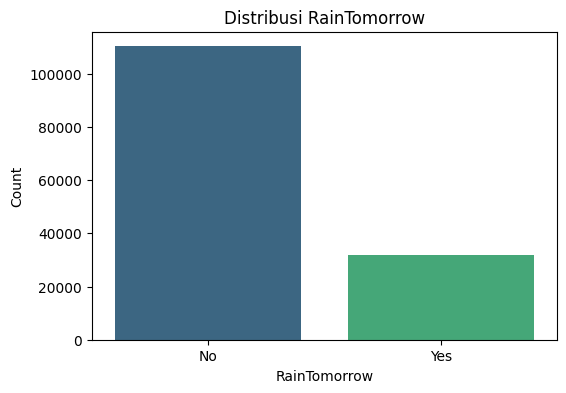

In [179]:
# Cek Imbalance Data
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='RainTomorrow', palette='viridis')
plt.title('Distribusi RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

## Preprocessing

### Cek Missing Value


In [180]:
# Cek missing value
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


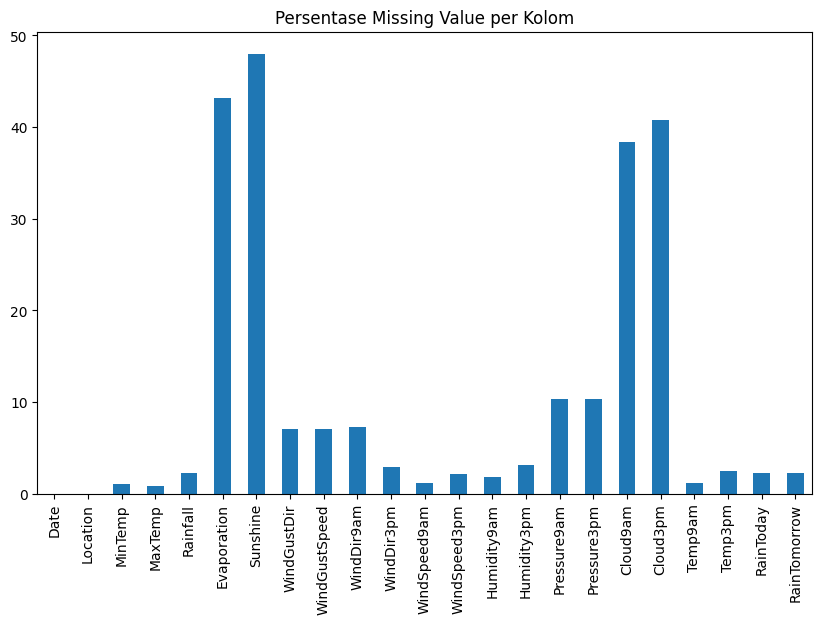

In [181]:
# Hitung jumlah dan persentase missing value untuk setiap kolom
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Visualisasi dalam bentuk diagram batang
plt.figure(figsize=(10,6))
missing_percent.plot(kind='bar')
plt.title('Persentase Missing Value per Kolom')
plt.show()

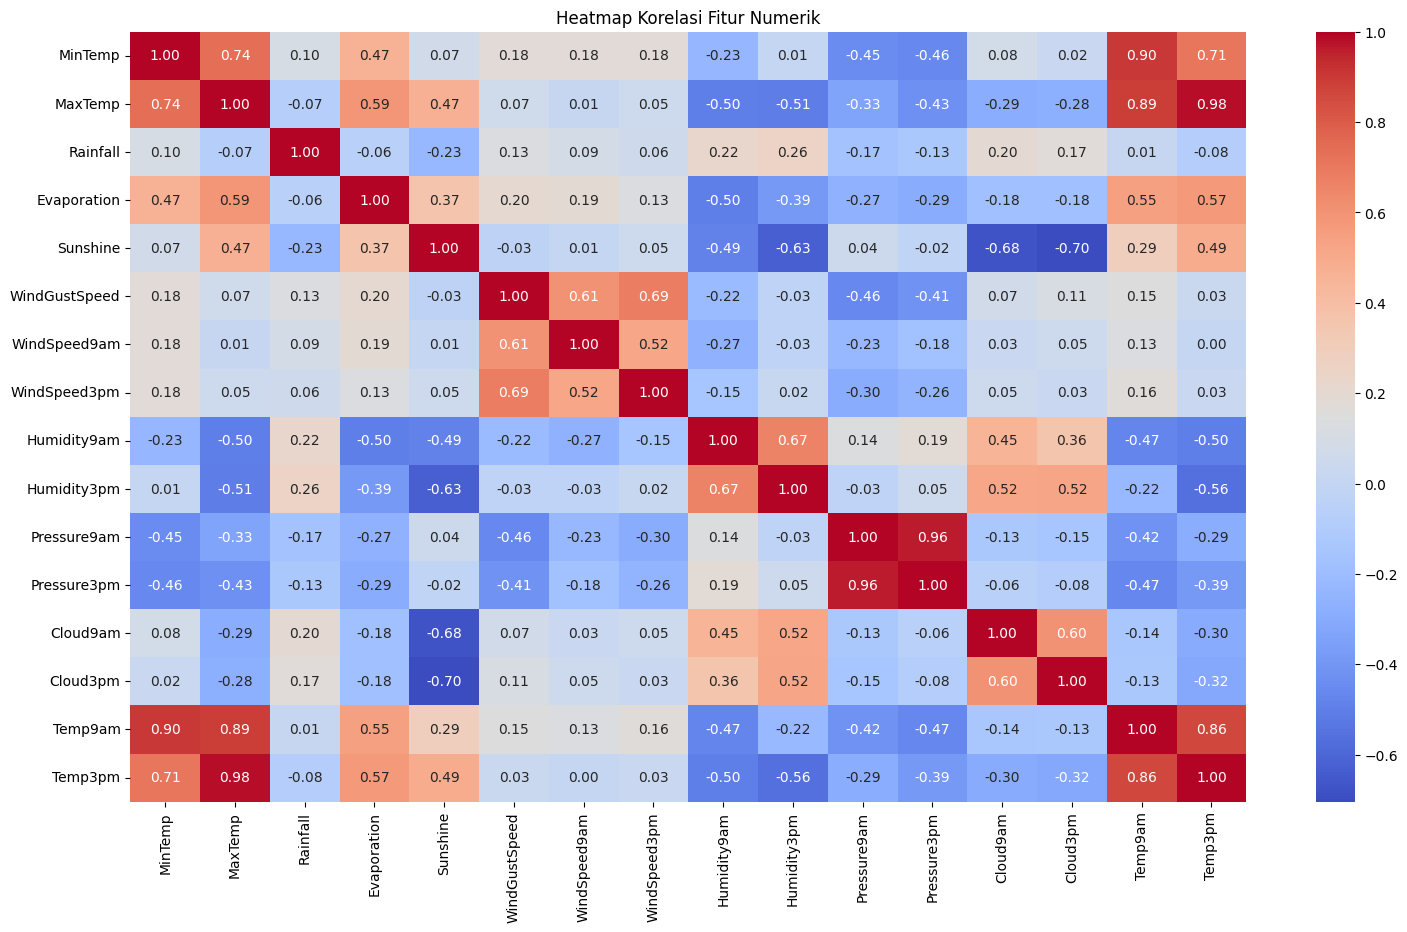

In [182]:
# heatmap korelasi
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [183]:
# Filter kolom dengan tipe data 'object' (yang biasanya berisi teks)
object_cols = df.select_dtypes(include='object').columns

# Hitung persentase missing value untuk kolom-kolom object
missing_object_percentage = df[object_cols].isnull().sum() / len(df) * 100
missing_object_percentage = missing_object_percentage.sort_values(ascending=False)

print("Persentase Missing Value untuk Kolom Teks (Object) :\n", missing_object_percentage)

Persentase Missing Value untuk Kolom Teks (Object) :
 WindDir9am      7.263853
WindGustDir     7.098859
WindDir3pm      2.906641
RainTomorrow    2.245978
RainToday       2.241853
Location        0.000000
Date            0.000000
dtype: float64


### Handling Missing Value

### Imputasi

In [184]:
# Imputasi missing value
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [185]:
# cek apakah sudah bersih
print(df.isnull().sum().sum(), "missing value tersisa")
df.isnull().sum()

0 missing value tersisa


,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [186]:
# Buang data yang targetnya kosong
df = df.dropna(subset=['RainTomorrow']).reset_index(drop=True)

# Ubah target jadi biner: No=1, Yes=0
df['RainTomorrow_bin'] = df['RainTomorrow'].map({'Yes':1, 'No':0})

# Tentukan fitur dan target
X = df.drop(columns=['Date', 'RainTomorrow', 'RainTomorrow_bin'])
y = df['RainTomorrow_bin']

# Pisahkan fitur numerik dan kategorikal
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Jumlah fitur numerik:", len(num_cols))
print("Jumlah fitur kategorikal:", len(cat_cols))
print("\nContoh fitur numerik:", num_cols[:5])
print("Contoh fitur kategorikal:", cat_cols[:5])

Jumlah fitur numerik: 16
Jumlah fitur kategorikal: 5

Contoh fitur numerik: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
Contoh fitur kategorikal: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Outlier

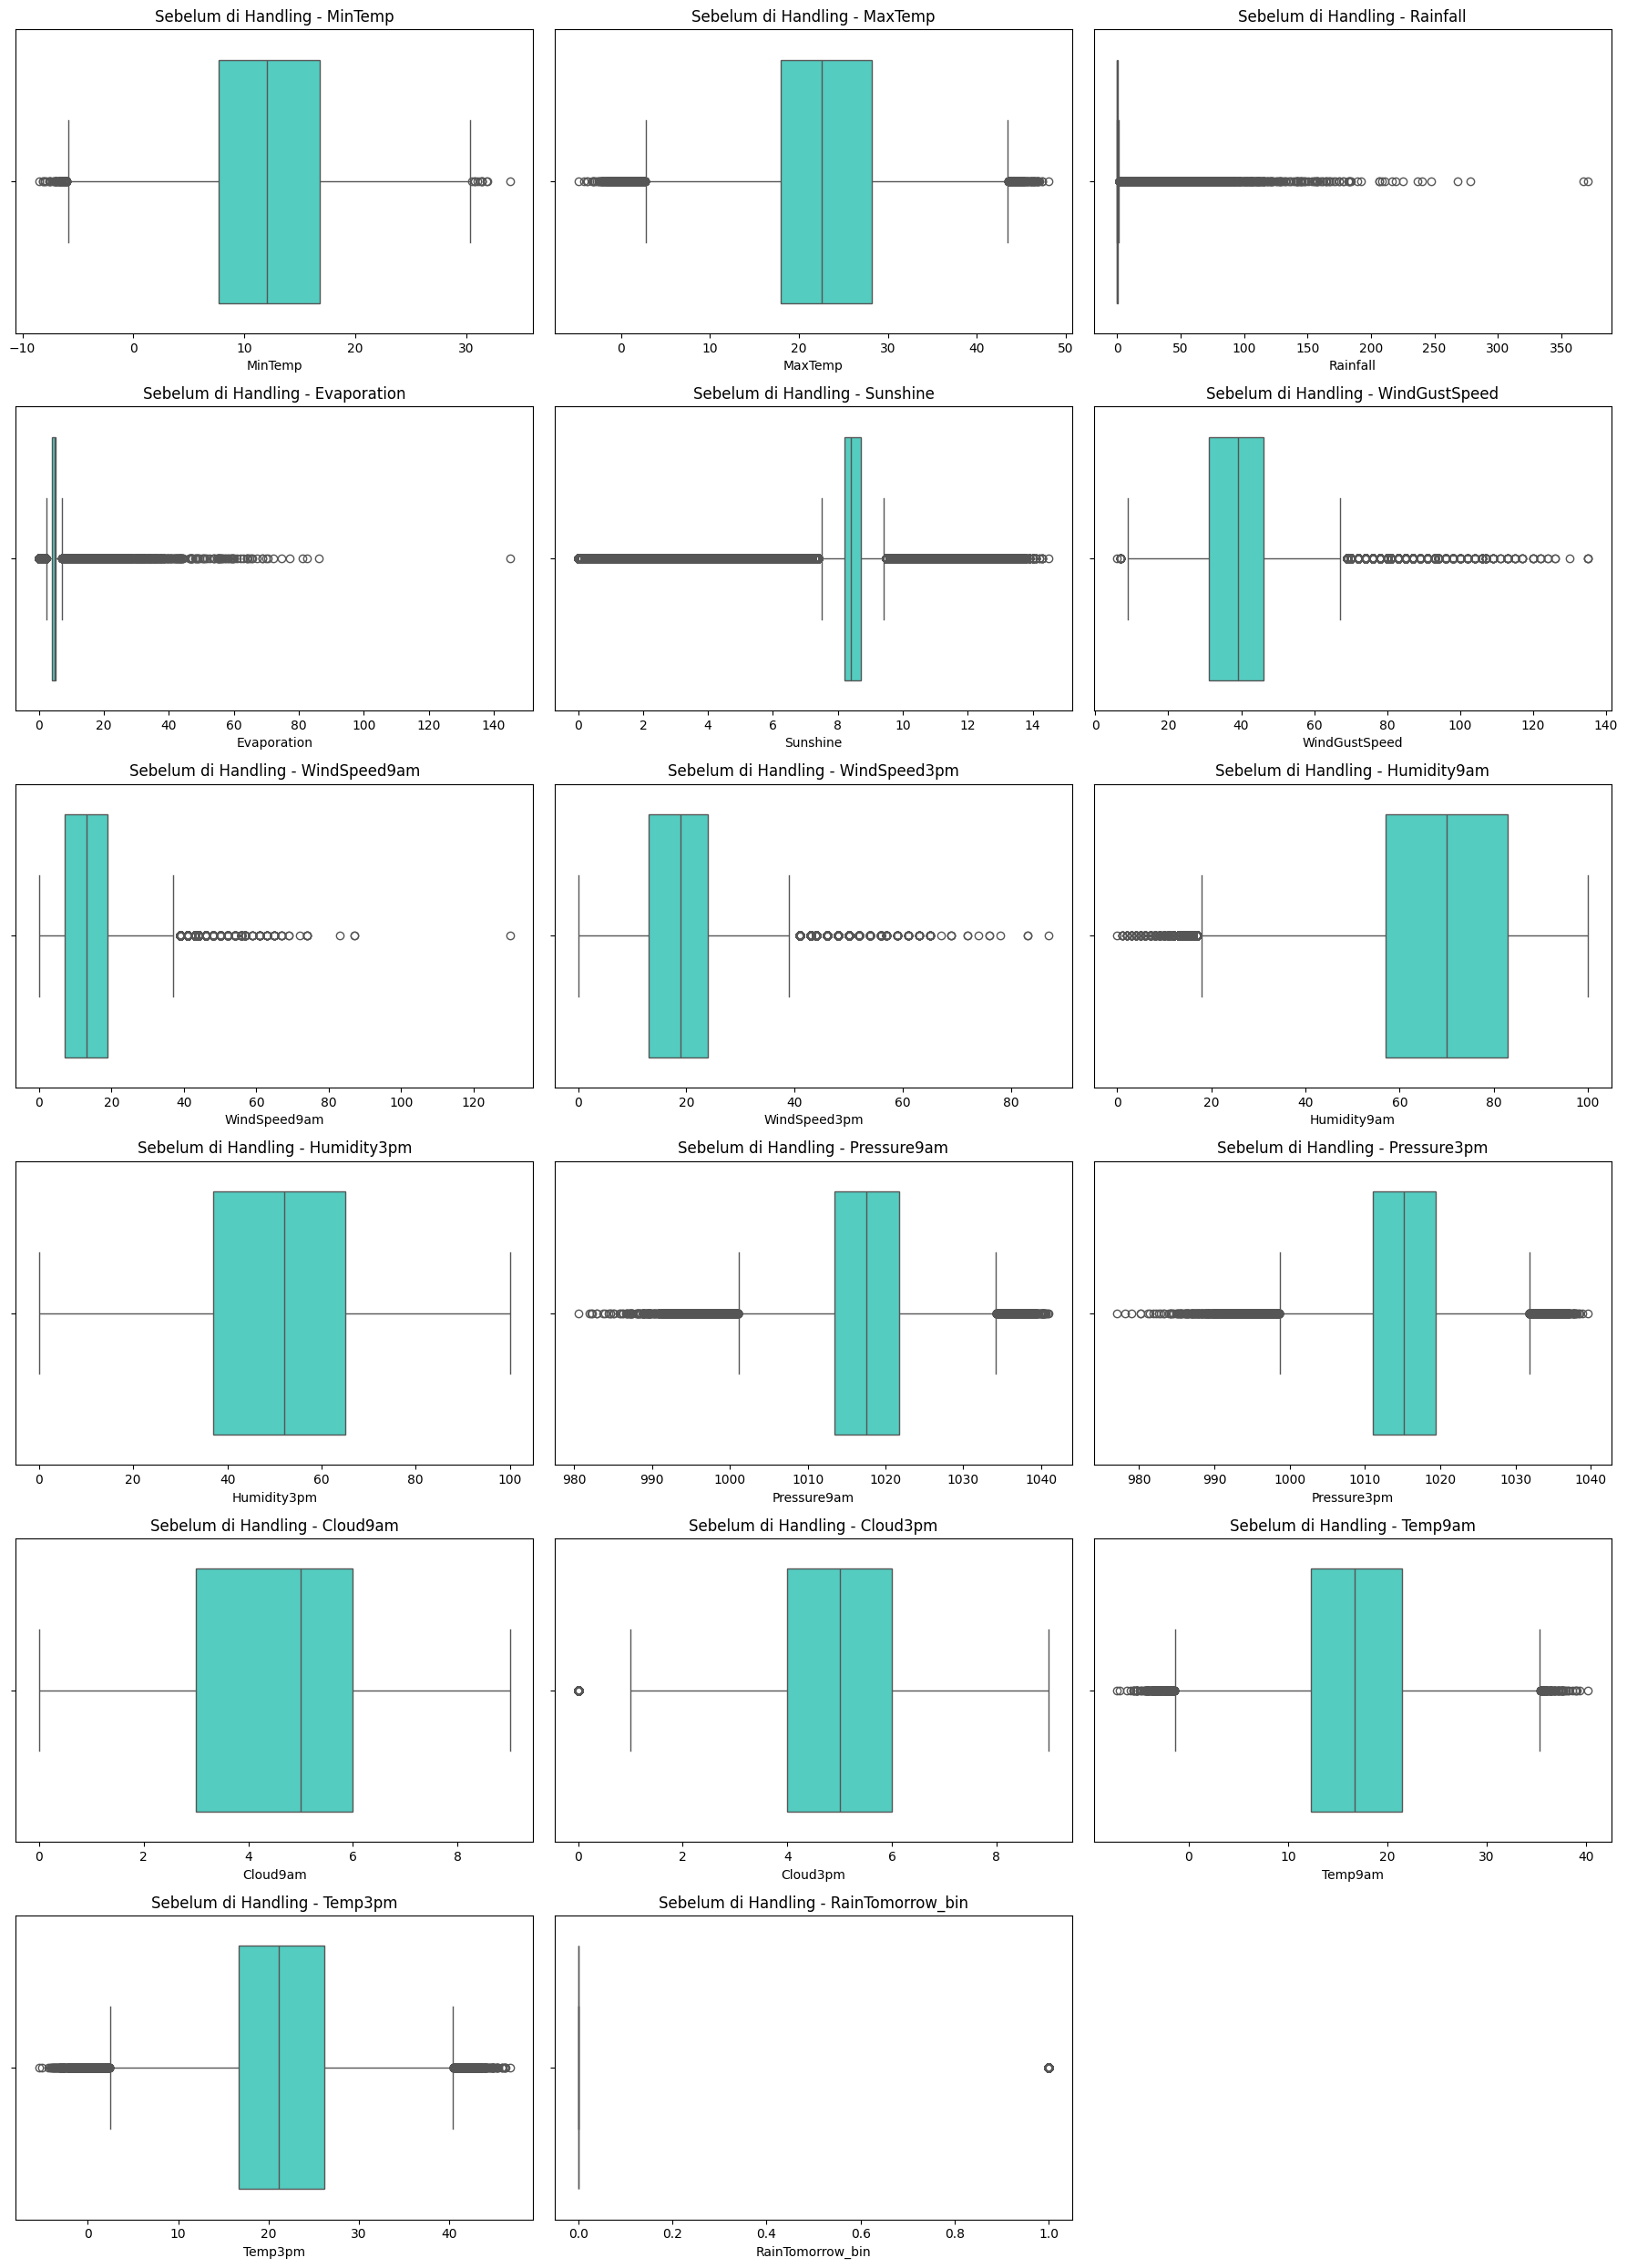

In [187]:
# Cek outlier
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Tampilkan boxplot awal (sebelum penanganan)
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols)//3)+1, 3, i+1)
    sns.boxplot(x=df[col], color='turquoise')
    plt.title(f"Sebelum di Handling - {col}")
plt.tight_layout()
plt.show()

### Handling Outlier

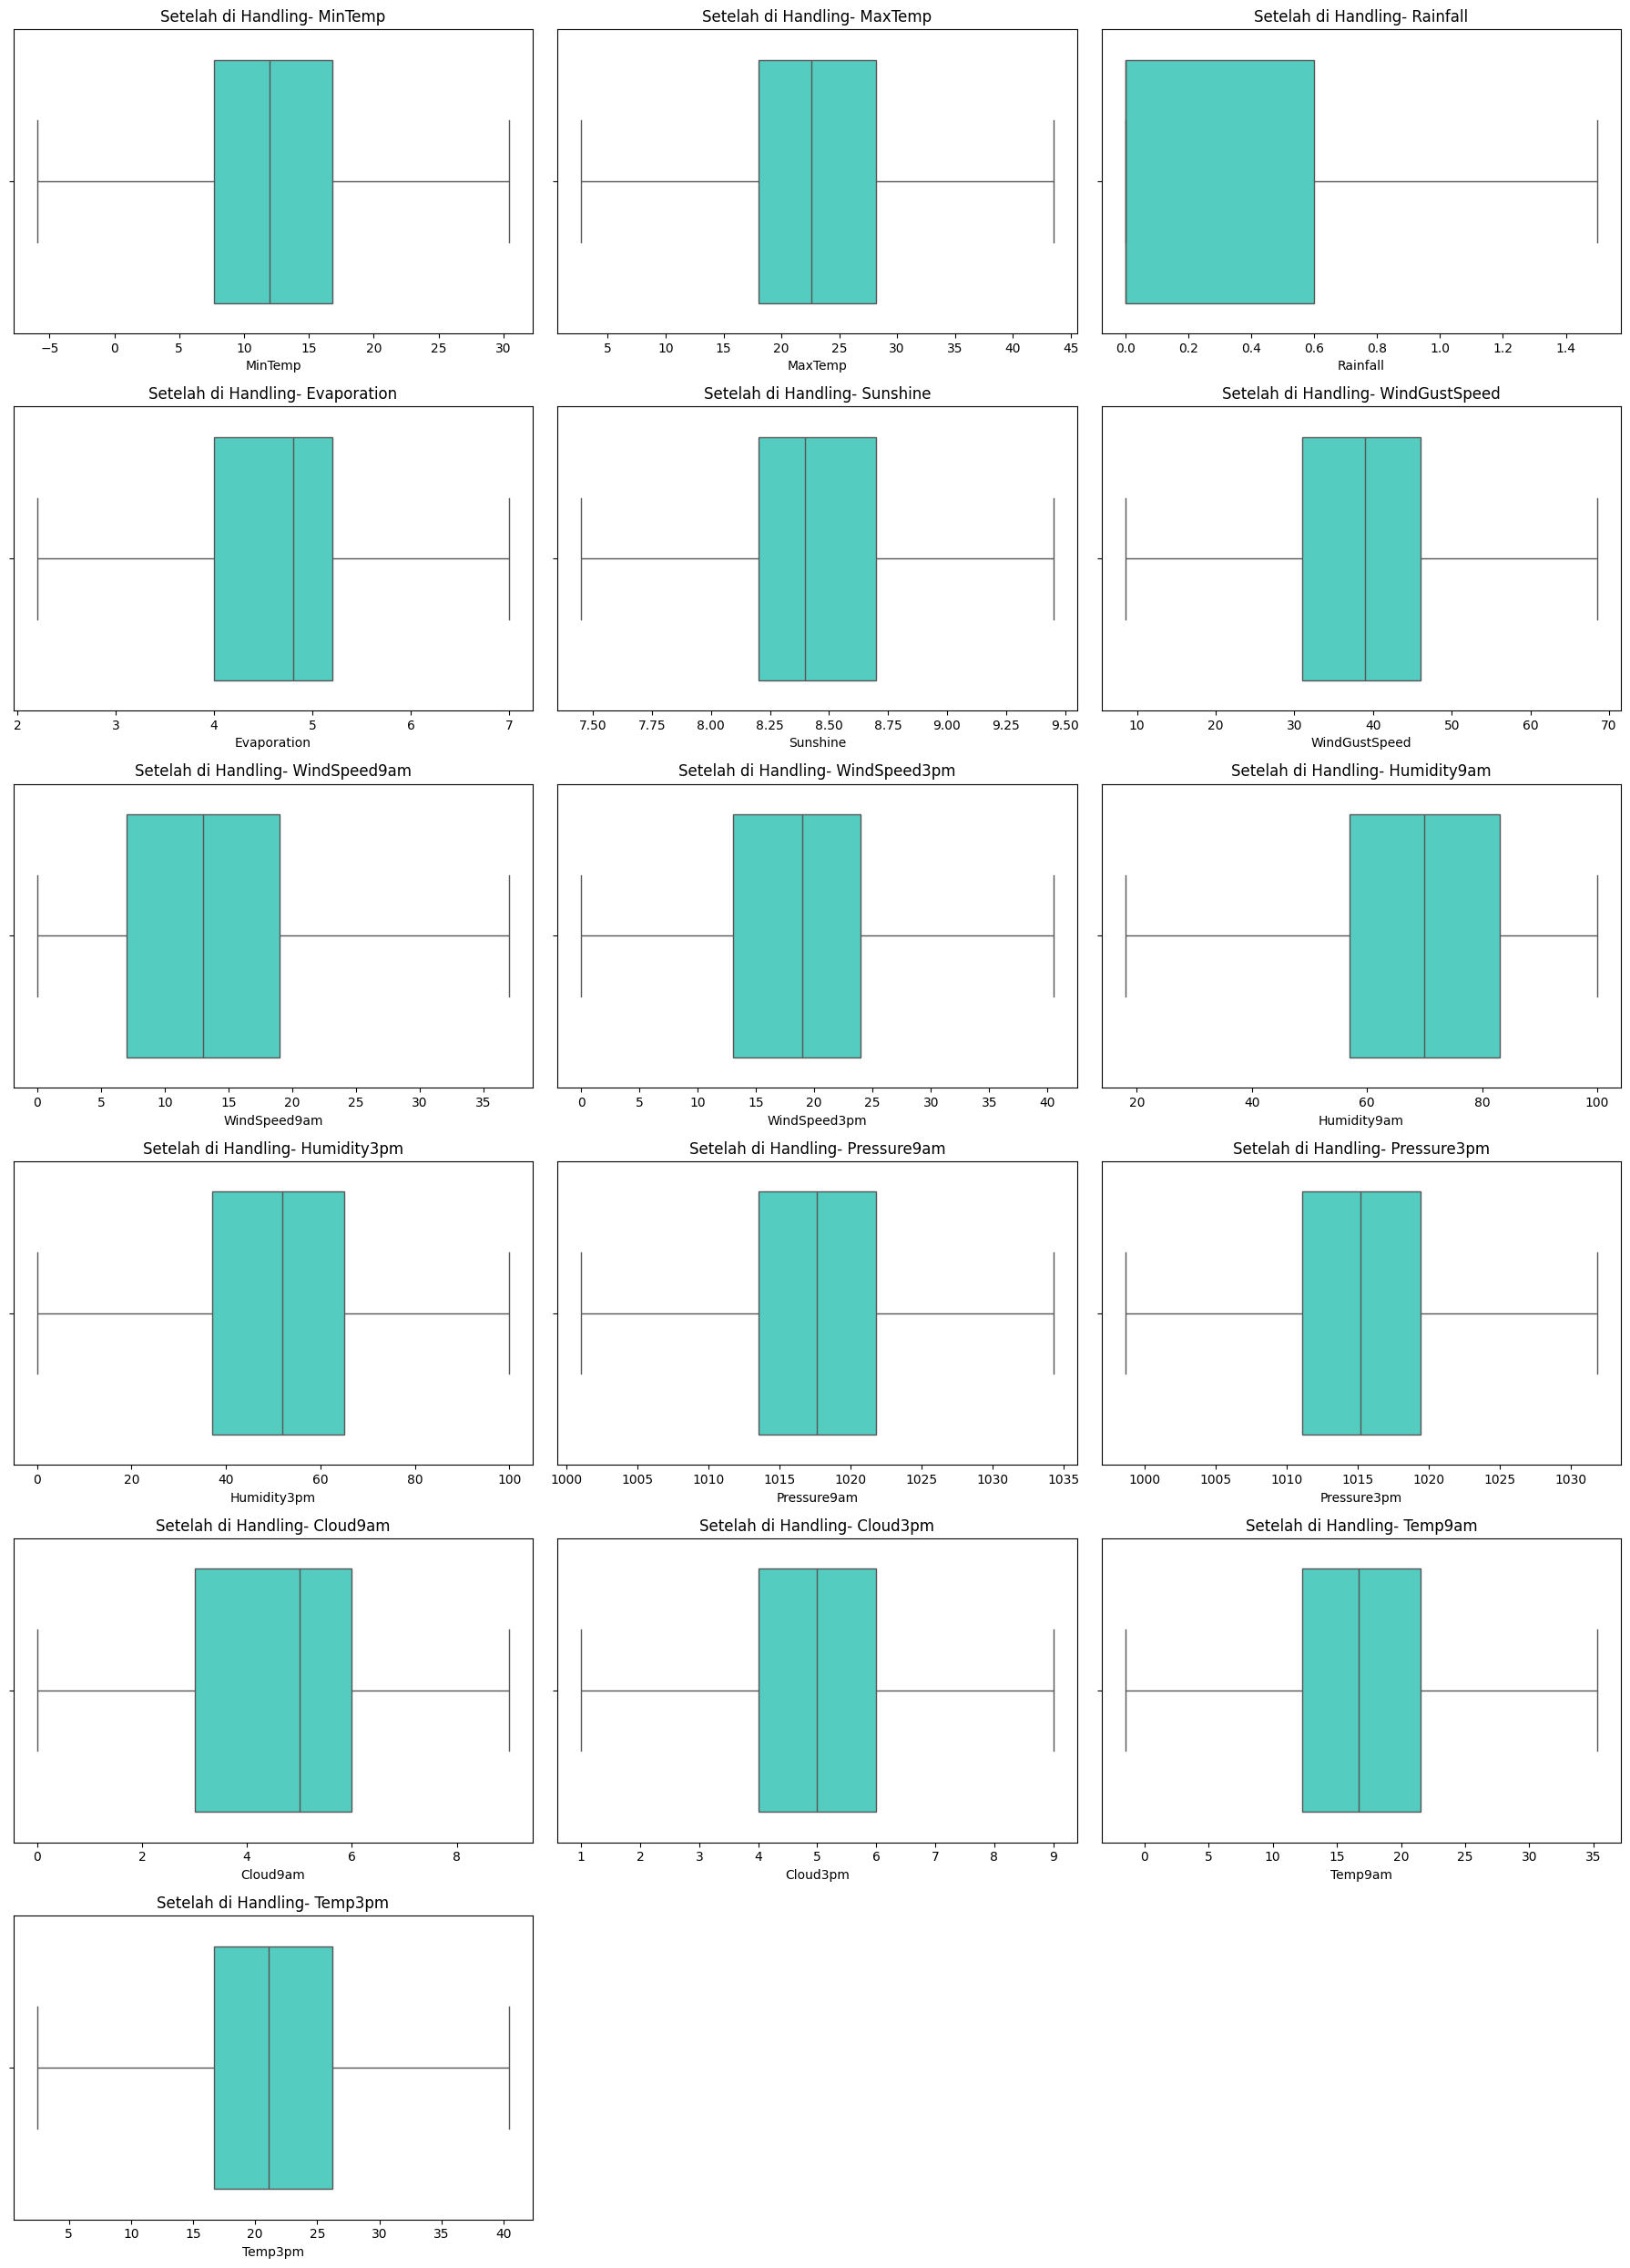

In [188]:
# Tangani outlier dengan metode IQR untuk semua fitur numerik
def handle_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap nilai di luar batas IQR
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound,
                                 np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col]))
    return df_clean
# Terapkan fungsi pada semua fitur numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('RainTomorrow_bin', errors='ignore')
df = handle_outliers_iqr(df, num_cols)

# Visualisasi ulang setelah penanganan
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols)//3)+1, 3, i+1)
    sns.boxplot(x=df[col], color='turquoise')
    plt.title(f"Setelah di Handling- {col}")
plt.tight_layout()
plt.show()


### Encoding

In [189]:
# One-hot encoding untuk fitur kategorikal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = pd.DataFrame(encoder.fit_transform(df[cat_cols]))

# Simpan nama kolom hasil encoding
encoded_cat.columns = encoder.get_feature_names_out(cat_cols)

# Gabungkan hasil encoding ke fitur numerik
df_encoded = pd.concat([df[num_cols].reset_index(drop=True),
                        encoded_cat.reset_index(drop=True)], axis=1)

### Scalling

In [190]:
# Scaling untuk semua fitur numerik
scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(df_encoded[num_cols]),
                          columns=num_cols)

# Ganti kolom numerik lama dengan yang sudah diskalakan
for col in num_cols:
    df_encoded[col] = scaled_num[col]

## Split Data

In [191]:
# Split Data 80:20

X = df_encoded.copy()
#y = df['RainTomorrow_bin']
y = df.loc[X.index, 'RainTomorrow_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (116368, 115)
Test shape : (29092, 115)


## Modelling

### Logistic Regression

===== Evaluasi Model: Logistic Regression =====
Akurasi : 0.8515399422521656
Presisi : 0.8421370326888945
Recall  : 0.8515399422521656
F1 Score: 0.8415142144471688

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.73      0.51      0.60      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.73      0.76     29092
weighted avg       0.84      0.85      0.84     29092



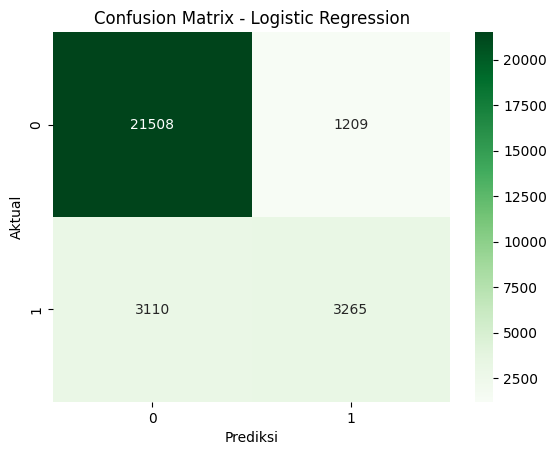

In [192]:
# Logistic Regression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("===== Evaluasi Model: Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test, y_pred_lr))
print("Presisi :", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

### Decission Tree

===== Evaluasi Model: Decision Tree =====
Akurasi : 0.7921077959576516
Presisi : 0.7947459770786953
Recall  : 0.7921077959576516
F1 Score: 0.7933763108102309

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     22717
           1       0.52      0.54      0.53      6375

    accuracy                           0.79     29092
   macro avg       0.70      0.70      0.70     29092
weighted avg       0.79      0.79      0.79     29092



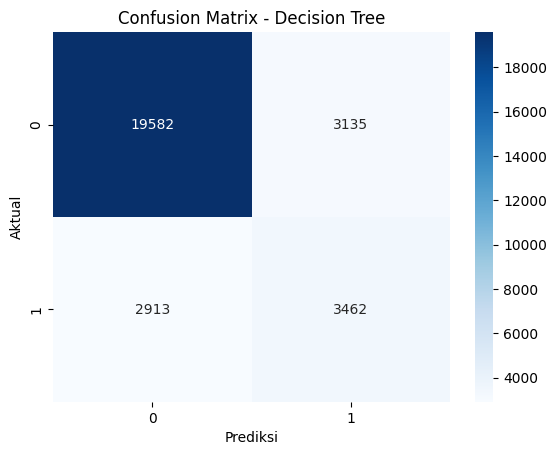

In [193]:
# Decission Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("===== Evaluasi Model: Decision Tree =====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt))
print("Presisi :", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

### Perbandingan Model

,Model,Accuracy,F1_Score
0,Logistic Regression,0.851540,0.841514
1,Decision Tree,0.792108,0.793376


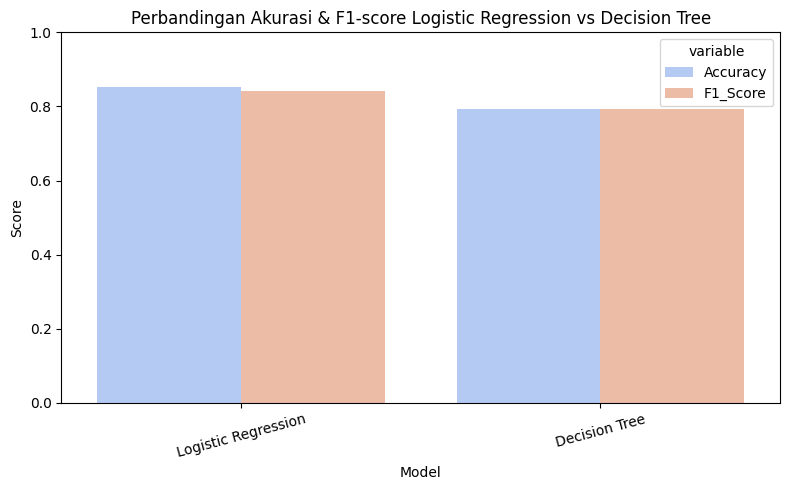

In [194]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt)
    ],
    'F1_Score': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score Logistic Regression vs Decision Tree')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Imbalance

/tmp/ipython-input-136945182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='coolwarm')


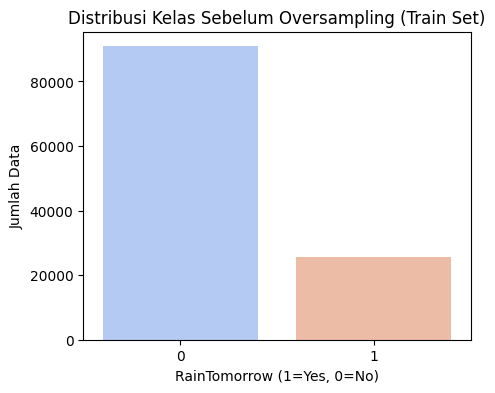

Jumlah sampel tiap kelas sebelum SMOTE:
RainTomorrow_bin
0    90866
1    25502
Name: count, dtype: int64


In [195]:
# Cek distribusi awal
plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette='coolwarm')
plt.title("Distribusi Kelas Sebelum Oversampling (Train Set)")
plt.xlabel("RainTomorrow (1=Yes, 0=No)")
plt.ylabel("Jumlah Data")
plt.show()

print("Jumlah sampel tiap kelas sebelum SMOTE:")
print(y_train.value_counts())

### Handling Imbalance
Handling imbalance dengan menggunkan teknik SMOTE

/tmp/ipython-input-3269501518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_over, palette='coolwarm')


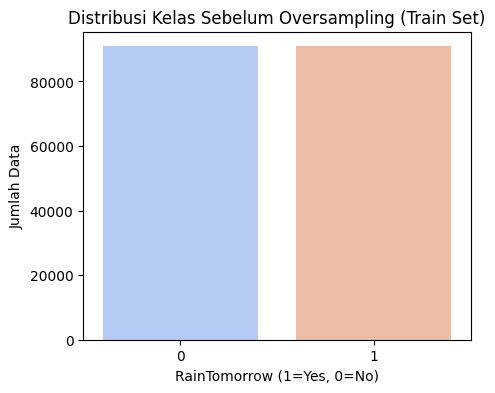

Jumlah sampel tiap kelas sebelum SMOTE:
RainTomorrow_bin
0    90866
1    90866
Name: count, dtype: int64


In [196]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah dilakukan smote
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_over, palette='coolwarm')
plt.title("Distribusi Kelas Sebelum Oversampling (Train Set)")
plt.xlabel("RainTomorrow (1=Yes, 0=No)")
plt.ylabel("Jumlah Data")
plt.show()

print("Jumlah sampel tiap kelas sebelum SMOTE:")
print(y_train_over.value_counts())

### Modelling

===== Evaluasi Model: Logistic Regression =====
Akurasi : 0.7911453320500481
Presisi : 0.836221250504025
Recall  : 0.7911453320500481
F1 Score: 0.8041685286952397

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22717
           1       0.52      0.77      0.62      6375

    accuracy                           0.79     29092
   macro avg       0.72      0.78      0.74     29092
weighted avg       0.84      0.79      0.80     29092



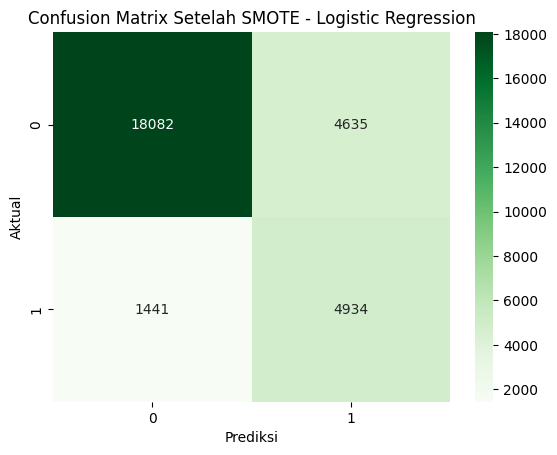

In [197]:
# Logistic Regression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_over, y_train_over)

y_pred_lr = lr_model.predict(X_test)

print("===== Evaluasi Model: Logistic Regression =====")
print("Akurasi :", accuracy_score(y_test, y_pred_lr))
print("Presisi :", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix Setelah SMOTE - Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

===== Evaluasi Model: Decision Tree =====
Akurasi : 0.7782895641413446
Presisi : 0.790009270468829
Recall  : 0.7782895641413446
F1 Score: 0.7833684855111335

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     22717
           1       0.49      0.56      0.53      6375

    accuracy                           0.78     29092
   macro avg       0.68      0.70      0.69     29092
weighted avg       0.79      0.78      0.78     29092



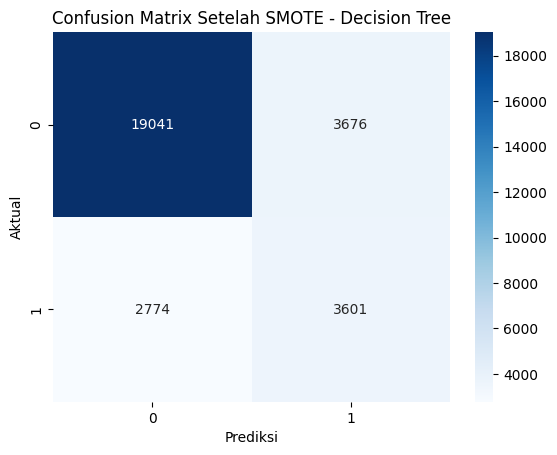

In [198]:
# Decission Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_over, y_train_over)

y_pred_dt = model_dt.predict(X_test)

print("===== Evaluasi Model: Decision Tree =====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt))
print("Presisi :", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Setelah SMOTE - Decision Tree")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

### Perbandingan F1 Score 'YES'

,Model,Kondisi,F1_Yes
0,Logistic Regression,Sebelum SMOTE,0.601899
1,Logistic Regression,Setelah SMOTE,0.618916
2,Decision Tree,Sebelum SMOTE,0.533765
3,Decision Tree,Setelah SMOTE,0.527542


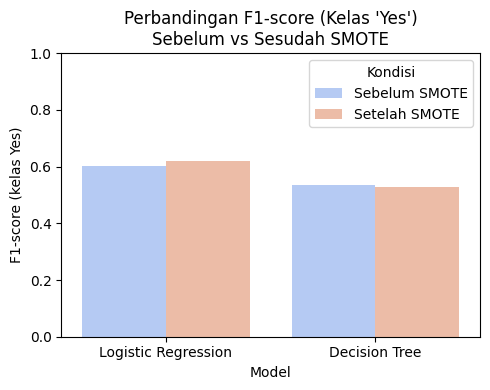

In [199]:
# Logistic Regression SEBELUM SMOTE
lr_before = LogisticRegression(max_iter=1000, random_state=42)
lr_before.fit(X_train, y_train)
y_pred_lr_before = lr_before.predict(X_test)

# Logistic Regression SESUDAH SMOTE (pakai model yang sudah ada)
y_pred_lr_after = lr_model.predict(X_test)

# Hitung F1-score untuk kelas 'Yes' (label = 1)
f1_yes_lr_before = f1_score(y_test, y_pred_lr_before, pos_label=1)
f1_yes_lr_after = f1_score(y_test, y_pred_lr_after, pos_label=1)

# Decision Tree SEBELUM SMOTE
dt_before = DecisionTreeClassifier(random_state=42)
dt_before.fit(X_train, y_train)
y_pred_dt_before = dt_before.predict(X_test)

# Decision Tree SESUDAH SMOTE (pakai model yang sudah dilatih setelah SMOTE)
y_pred_dt_after = model_dt.predict(X_test)

# Hitung F1-score kelas 'Yes'
f1_yes_dt_before = f1_score(y_test, y_pred_dt_before, pos_label=1)
f1_yes_dt_after = f1_score(y_test, y_pred_dt_after, pos_label=1)

# Bandingkan hasil dalam tabel
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression', 'Decision Tree', 'Decision Tree'],
    'Kondisi': ['Sebelum SMOTE', 'Setelah SMOTE', 'Sebelum SMOTE', 'Setelah SMOTE'],
    'F1_Yes': [f1_yes_lr_before, f1_yes_lr_after, f1_yes_dt_before, f1_yes_dt_after]
})

display(comparison)

# Visualisasi perbandingan F1-score
plt.figure(figsize=(5,4))
sns.barplot(data=comparison, x='Model', y='F1_Yes', hue='Kondisi', palette='coolwarm')
plt.title("Perbandingan F1-score (Kelas 'Yes')\nSebelum vs Sesudah SMOTE")
plt.ylabel("F1-score (kelas Yes)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()



## Feature Selection

/tmp/ipython-input-3993518072.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


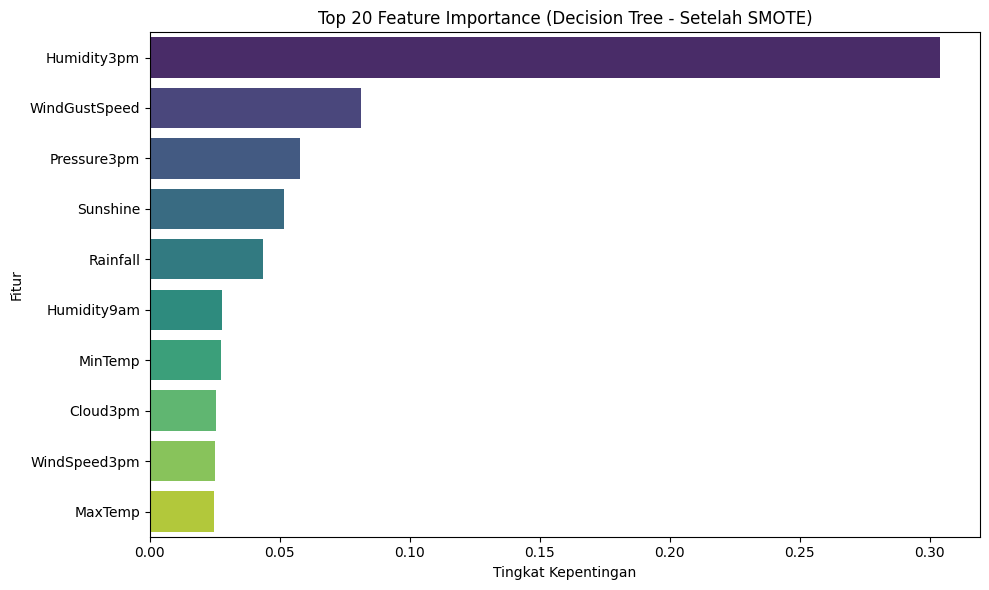

,Feature,Importance
9,Humidity3pm,0.304167
5,WindGustSpeed,0.081344
11,Pressure3pm,0.057574
4,Sunshine,0.051414
2,Rainfall,0.043494
8,Humidity9am,0.027649
0,MinTemp,0.027488
13,Cloud3pm,0.025299
7,WindSpeed3pm,0.025117
1,MaxTemp,0.024703


In [200]:
# Latih model Decision Tree dengan data hasil SMOTE
model_dt_fs = DecisionTreeClassifier(random_state=42)
model_dt_fs.fit(X_train_over, y_train_over)

# Ambil nilai importance
importance = pd.DataFrame({
    'Feature': X_train_over.columns,
    'Importance': model_dt_fs.feature_importances_
})

# Urutkan dari yang paling penting
importance = importance.sort_values(by='Importance', ascending=False)

# Tampilkan 10 fitur teratas
top_features = importance.head(10)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importance (Decision Tree - Setelah SMOTE)")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

# Tampilkan tabel
display(top_features)

## Hyperparameter Tuning untuk 2 Model: Logistic Regression & Decision Tree

In [201]:
# Logistic Regression
param_lr = {
    'C': [0.1, 1.0, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Decision Tree
param_dt = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Simpan ke dictionary
param_grids = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), param_lr),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_dt)
}

# Proses Grid Search untuk masing-masing model

best_models = {}
tuned_results = []

for name, (model, params) in param_grids.items():
    print(f"=== Tuning Model - {name} ===")
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=3,
        scoring='f1',      # Fokus pada F1-score (kelas Yes)
        n_jobs=-1,
        verbose=1
    )

    # Gunakan data hasil SMOTE (X_train_over, y_train_over)
    grid.fit(X_train_over, y_train_over)

    # Simpan model terbaik
    best_models[name] = grid.best_estimator_

    # Evaluasi pada data test
    y_pred = best_models[name].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1_yes = f1_score(y_test, y_pred, pos_label=1)

    print(f"Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:}")
    print(f"F1-score (Yes): {f1_yes:}")

    tuned_results.append({
        'Model': name,
        'Accuracy_Tuned': acc,
        'F1_Yes_Tuned': f1_yes
    })

# Tampilkan Hasil Tuning

results_tuned = pd.DataFrame(tuned_results)
display(results_tuned)

=== Tuning Model - Logistic Regression ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params: {'C': 1.0, 'solver': 'liblinear'}
Accuracy: 0.7909734634951189
F1-score (Yes): 0.6187699830731616
=== Tuning Model - Decision Tree ===
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.7782895641413446
F1-score (Yes): 0.5275417521242309


,Model,Accuracy_Tuned,F1_Yes_Tuned
0,Logistic Regression,0.790973,0.618770
1,Decision Tree,0.778290,0.527542


,Model,Accuracy_Before,F1_Yes_Before,Accuracy_Tuned,F1_Yes_Tuned
0,Logistic Regression,0.791145,0.618916,0.790973,0.618770
1,Decision Tree,0.778290,0.527542,0.778290,0.527542


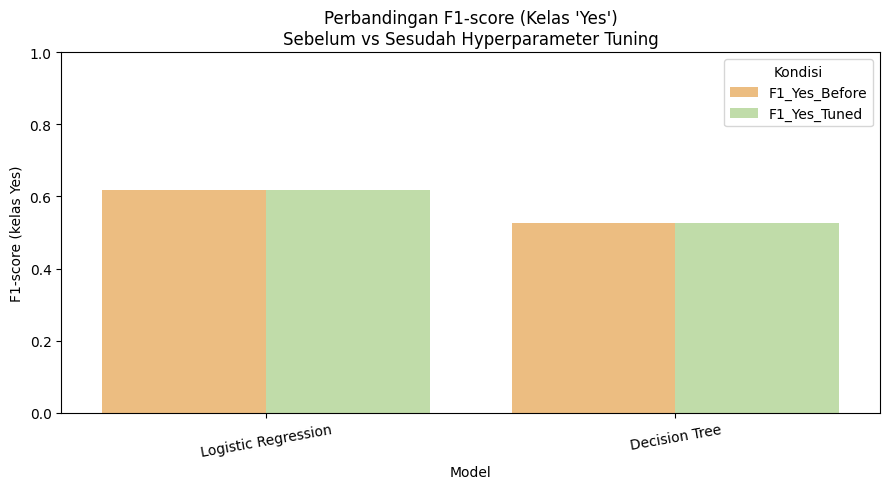

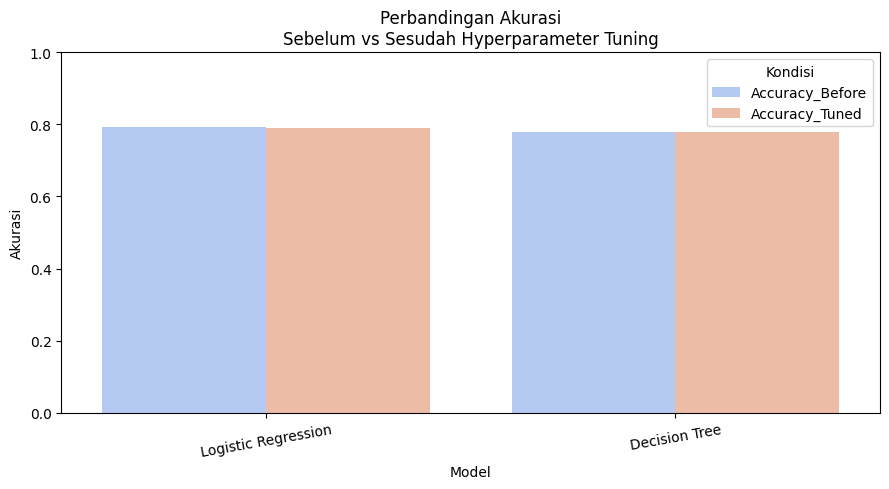

In [202]:
# Konversi results_smote ke DataFrame

results_smote = [
    {
        'Model': 'Logistic Regression',
        'Accuracy_SMOTE': accuracy_score(y_test, y_pred_lr_after),
        'F1_Yes_SMOTE': f1_score(y_test, y_pred_lr_after, pos_label=1)
    },
    {
        'Model': 'Decision Tree',
        'Accuracy_SMOTE': accuracy_score(y_test, y_pred_dt_after),
        'F1_Yes_SMOTE': f1_score(y_test, y_pred_dt_after, pos_label=1)
    }
]

results_smote_df = pd.DataFrame(results_smote)

# Ambil metrik utama sebelum tuning
results_before_tune = results_smote_df[['Model', 'Accuracy_SMOTE', 'F1_Yes_SMOTE']].rename(columns={
    'Accuracy_SMOTE': 'Accuracy_Before',
    'F1_Yes_SMOTE': 'F1_Yes_Before'
})

# Gabungkan dengan hasil sesudah tuning
results_tuned_df = pd.DataFrame(tuned_results)
results_compare = results_before_tune.merge(results_tuned_df, on='Model')

# Tampilkan tabel hasil perbandingan
display(results_compare)

# Visualisasi Perbandingan F1-score Sebelum vs Sesudah Tuning
plt.figure(figsize=(9,5))
sns.barplot(
    data=results_compare.melt(
        id_vars='Model',
        value_vars=['F1_Yes_Before','F1_Yes_Tuned']
    ),
    x='Model', y='value', hue='variable', palette='Spectral'
)
plt.title("Perbandingan F1-score (Kelas 'Yes')\nSebelum vs Sesudah Hyperparameter Tuning")
plt.ylabel("F1-score (kelas Yes)")
plt.ylim(0, 1)
plt.xticks(rotation=10)
plt.legend(title="Kondisi")
plt.tight_layout()
plt.show()

# Visualisasi Peningkatan Akurasi
plt.figure(figsize=(9,5))
sns.barplot(
    data=results_compare.melt(
        id_vars='Model',
        value_vars=['Accuracy_Before','Accuracy_Tuned']
    ),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title("Perbandingan Akurasi\nSebelum vs Sesudah Hyperparameter Tuning")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.xticks(rotation=10)
plt.legend(title="Kondisi")
plt.tight_layout()
plt.show()
